## Leitura de uma base de imagens na forma
* base/
    * treino/
        * classes/...
            * imagens/...
    * teste/
        * classes/...
            * imagens/...

#### Será salva no formato
[matriz, numero da classe, nome da pasta onde a imagem esta salva (nome da classe)]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pickle
import os
import pathlib

In [2]:
DATADIR = '../data/mnist/train'
#DATADIR = '../data/mnist/test'

DATADIR = pathlib.Path(DATADIR)

IMG_SIZE = 'original'#Tamanho mxm e original
#IMG_SIZE = 28#'original'#Tamanho mxm e original

formato = 'jpg'

nome_saida = "mnist_train"

local_saida = '../data/'

In [3]:
CATEGORIES = os.listdir(DATADIR)
CATEGORIES.sort()

try:
    CATEGORIES.remove('.ipynb_checkpoints')
except:
    pass
print(CATEGORIES)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [4]:
SIZE_OF_DATASET = len(list(DATADIR.glob('*/*.'+formato)))

print("Number of training images: ",SIZE_OF_DATASET)

Number of training images:  56223


In [5]:
def prep_data(DATA_DIR, CATEGORIES, IMG_SIZE):
    data = []
    for category in CATEGORIES:
        i=0
        path = os.path.join(DATA_DIR,category)
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                #img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
                
                if IMG_SIZE == 'original':
                    new_array = img_array
                else:
                    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                
                new_array = new_array.astype('float32')  # Ensure the array is of dtype float32
                data.append([new_array, class_num, category])
            except Exception as e:
                print(f"Error loading image {img}: {e}")
                continue

            i=i+1
            #if i >= 1000:
            #    break

        plt.figure(figsize=(1,1))
        plt.imshow(new_array, cmap='gray')
        plt.show()
    return data

100%|██████████| 5923/5923 [00:00<00:00, 40983.60it/s]


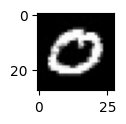

100%|██████████| 6742/6742 [00:00<00:00, 46478.83it/s]


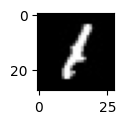

100%|██████████| 5250/5250 [00:01<00:00, 4272.49it/s]


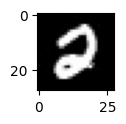

100%|██████████| 6131/6131 [00:01<00:00, 3976.01it/s]


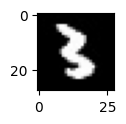

100%|██████████| 5842/5842 [00:01<00:00, 3768.04it/s]


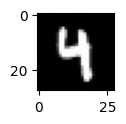

100%|██████████| 5421/5421 [00:01<00:00, 3520.67it/s]


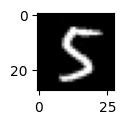

100%|██████████| 5918/5918 [00:01<00:00, 3255.29it/s]


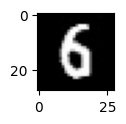

100%|██████████| 6265/6265 [00:01<00:00, 3581.85it/s]


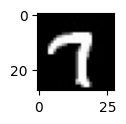

100%|██████████| 2782/2782 [00:00<00:00, 3723.78it/s]


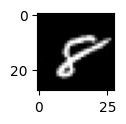

100%|██████████| 5949/5949 [00:02<00:00, 2539.61it/s]


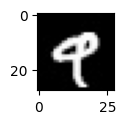

Number of images:  56223


In [6]:
data = prep_data(DATADIR, CATEGORIES, IMG_SIZE)
print('Number of images: ',len(data))

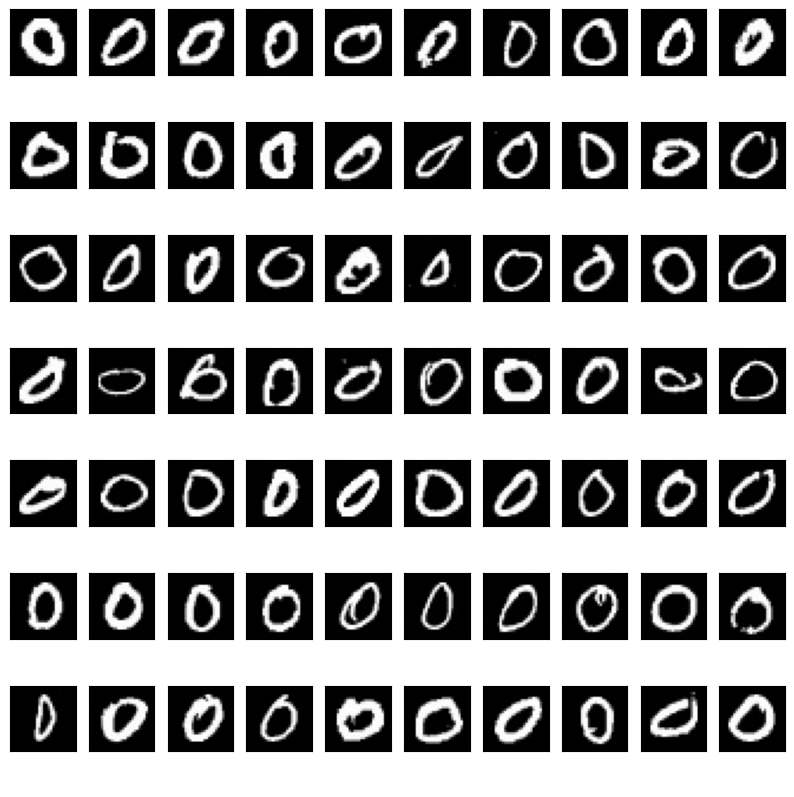

In [7]:
plt.figure(figsize=(10,10))
m = 70
if( len(data) < 70 ):
    m = len(data)
for i in range(m):
    plt.subplot(7,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[i][0], cmap='gray')
    plt.xlabel("{}\n({})".format( data[i][1] , data[i][2] ), color='white')
plt.show()

In [8]:
def save_data(save_name, data):
    pickle_out = open(save_name+"-pickle.pickle","wb")
    print('Arquivo gravado como: '+save_name+"-pickle.pickle")
    pickle.dump(data, pickle_out)
    pickle_out.close()

In [9]:
save_data(local_saida+nome_saida, data)

Arquivo gravado como: ../data/mnist_train-pickle.pickle
